<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#loading dataset
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome

In [12]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

0 0.0  Depth: 14  Nodes: 235  Train set accuracy: 1.0  Test set Accuracy: 0.7792207792207793
     Confusion Matrix: [array([78, 23]), array([19, 34])]
1 0.001  Depth: 14  Nodes: 233  Train set accuracy: 1.0  Test set Accuracy: 0.7402597402597403
     Confusion Matrix: [array([78, 23]), array([19, 34])]
2 0.002  Depth: 13  Nodes: 151  Train set accuracy: 0.9641693811074918  Test set Accuracy: 0.7597402597402597
     Confusion Matrix: [array([78, 23]), array([19, 34])]
3 0.003  Depth: 12  Nodes: 87  Train set accuracy: 0.9087947882736156  Test set Accuracy: 0.7727272727272727
     Confusion Matrix: [array([78, 23]), array([19, 34])]
4 0.004  Depth: 8  Nodes: 37  Train set accuracy: 0.8403908794788274  Test set Accuracy: 0.7922077922077922
     Confusion Matrix: [array([78, 23]), array([19, 34])]
5 0.005  Depth: 6  Nodes: 25  Train set accuracy: 0.8143322475570033  Test set Accuracy: 0.7792207792207793
     Confusion Matrix: [array([78, 23]), array([19, 34])]
6 0.006  Depth: 6  Nodes: 23 

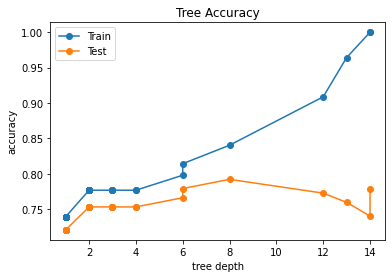

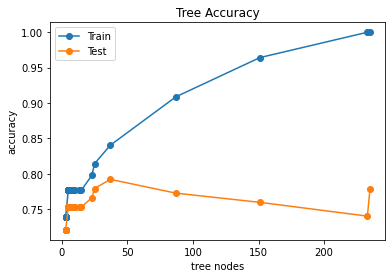

In [42]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

train_acc = []
test_acc = []
treenodes = []
treedepth = []
save_model = []

for i in range(0,40):
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', ccp_alpha=i/1000)

   # Save model for 

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   save_model.append(model)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print(i, i/1000, " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:", metrics.accuracy_score(y_train, y_train_pred), " Test set Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

   #printConfusion matrix
   print("     Confusion Matrix:", list(confusion_matrix(y_test,y_pred)))

#plot results vs tree depth
pyplot.plot(treedepth, train_acc , '-o', label='Train')
pyplot.plot(treedepth, test_acc, '-o', label='Test')
pyplot.title('Tree Accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree depth')
pyplot.legend()
pyplot.show()

#plot results vs number of nodes
pyplot.plot(treenodes, train_acc , '-o', label='Train')
pyplot.plot(treenodes, test_acc, '-o', label='Test')
pyplot.title('Tree Accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree nodes')
pyplot.legend()
pyplot.show()

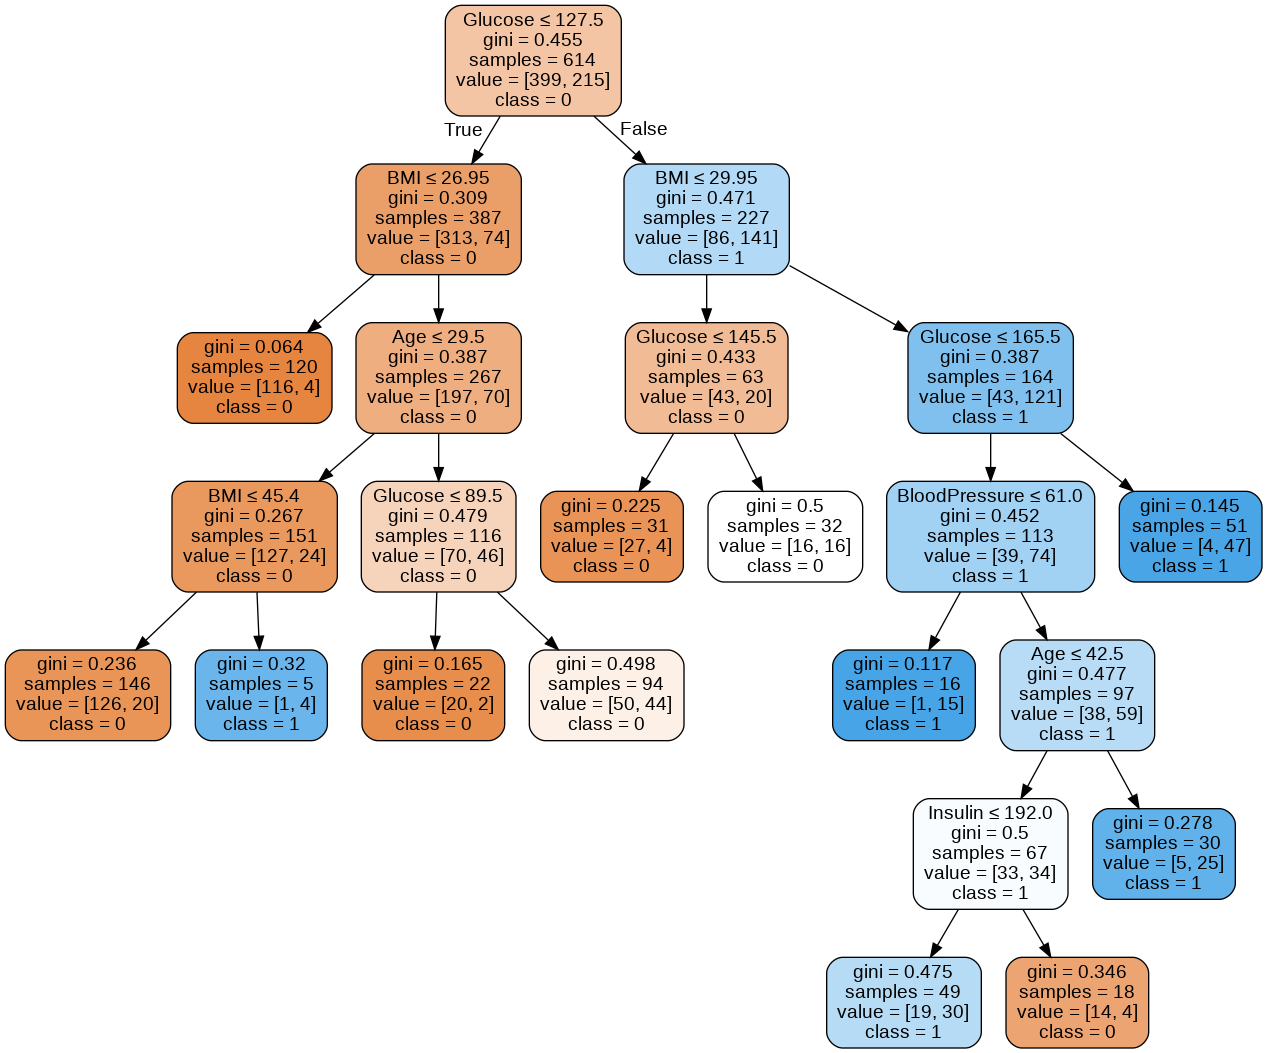

In [43]:
#Option to plot decision tree - do manually
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

model_pick=6
features=x.columns
dot_data = StringIO()
export_graphviz(save_model[model_pick], out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())